In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from sklearn.datasets import make_blobs

In [2]:
X,Y = make_blobs(n_samples=500,centers=2,n_features=2,random_state=1)

In [3]:
print(X.shape,Y.shape)

(500, 2) (500,)


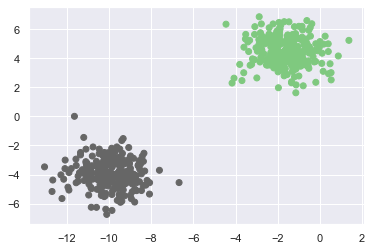

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [5]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [6]:
def predict(X,weights):
    """X - m x (n+1) matrix, w - (n+1,) vector"""
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,Y,weights):
    """ Binary cross entropy """
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    """ Weight updates for 1 epoch"""
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_ - Y)
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

def train(X,Y,learning_rate=0.5,maxEpochs=100):
    #Modifying the input to handle the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    weights = np.zeros(X.shape[1])
    
    for epoch in range(maxEpochs):
        weights = update(X,Y,weights,learning_rate)
        
        if epoch%10 == 0:
            l = loss(X,Y,weights)
            print("Epoch %d Loss %.3f"%(epoch,l))
            
    return weights        

In [7]:
weights = train(X,Y,learning_rate=0.8,maxEpochs=500)

Epoch 0 Loss 0.038
Epoch 10 Loss 0.009
Epoch 20 Loss 0.005
Epoch 30 Loss 0.003
Epoch 40 Loss 0.002
Epoch 50 Loss 0.002
Epoch 60 Loss 0.001
Epoch 70 Loss 0.001
Epoch 80 Loss 0.001
Epoch 90 Loss 0.001
Epoch 100 Loss 0.001
Epoch 110 Loss 0.001
Epoch 120 Loss 0.001
Epoch 130 Loss 0.001
Epoch 140 Loss 0.001
Epoch 150 Loss 0.001
Epoch 160 Loss 0.001
Epoch 170 Loss 0.001
Epoch 180 Loss 0.000
Epoch 190 Loss 0.000
Epoch 200 Loss 0.000
Epoch 210 Loss 0.000
Epoch 220 Loss 0.000
Epoch 230 Loss 0.000
Epoch 240 Loss 0.000
Epoch 250 Loss 0.000
Epoch 260 Loss 0.000
Epoch 270 Loss 0.000
Epoch 280 Loss 0.000
Epoch 290 Loss 0.000
Epoch 300 Loss 0.000
Epoch 310 Loss 0.000
Epoch 320 Loss 0.000
Epoch 330 Loss 0.000
Epoch 340 Loss 0.000
Epoch 350 Loss 0.000
Epoch 360 Loss 0.000
Epoch 370 Loss 0.000
Epoch 380 Loss 0.000
Epoch 390 Loss 0.000
Epoch 400 Loss 0.000
Epoch 410 Loss 0.000
Epoch 420 Loss 0.000
Epoch 430 Loss 0.000
Epoch 440 Loss 0.000
Epoch 450 Loss 0.000
Epoch 460 Loss 0.000
Epoch 470 Loss 0.000
Epo

In [8]:
def getPredictions(X_Test,weights,labels=True):
    if X_Test.shape[1] != weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))
        
    probs = predict(X_Test,weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

In [9]:
x1 = np.linspace(-12,2,10)
x2 = -(weights[0] + weights[1]*x1)/weights[2]

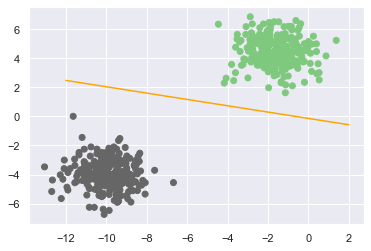

In [10]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='orange')
plt.show()

In [11]:
Y_ = getPredictions(X,weights,labels=True)
training_accuracy = np.sum(Y_==Y)/Y.shape[0]
print(training_accuracy)

1.0
